In [783]:

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score,mean_squared_error
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import matplotlib.dates

In [949]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [950]:
train['keywords'].head()

0                                  drawing-for-dollars
1    sponsor-dereck-blackburn-lostwars-artist-in-re...
2                                         mr-squiggles
3                        help-me-write-my-second-novel
4               support-casting-my-sculpture-in-bronze
Name: keywords, dtype: object

In [951]:
train['currency'].value_counts()

USD    92033
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

In [952]:

posix_time = train['deadline'].iloc[0]
datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%d')

'2009-05-03'

In [953]:
train['deadline_time'] = train['deadline'].map(lambda row : datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [954]:
test['deadline_time'] = test['deadline'].map(lambda row : datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [955]:
train['state_changed_time'] = train['state_changed_at'].map(lambda row:datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [956]:
test['state_changed_time'] = test['state_changed_at'].map(lambda row:datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [957]:
train['created_time'] = train['created_at'].map(lambda row: datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))


In [958]:
test['created_time'] = test['created_at'].map(lambda row: datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))


In [959]:
train['launched_time'] = train['launched_at'].map(lambda row:datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [960]:
test['launched_time'] = test['launched_at'].map(lambda row:datetime.utcfromtimestamp(row).strftime('%Y-%m-%d')).map(lambda row: datetime.strptime(row,'%Y-%m-%d'))

In [961]:
rates = {
    'GBP': 1.38,
    'CAD': 0.77,
    'AUD': 0.75,
    'EUR': 1.13,
    'NZD': 0.70,
    'SEK': 0.11,
    'DKK': 0.15,
    'NOK': 0.12,
    'CHF': 1.0, # in test
    'HKD': 0.13, #in Test
    'SGD': 0.73, #in Test
    'MXN': 0.07 # in Test
}

In [962]:
train['actual_money'] = train.apply(lambda row: row['goal']*rates[row['currency']] if(not(row['currency'] == 'USD')) else row['goal'],axis=1) 
test['actual_money'] = test.apply(lambda row: row['goal']*rates[row['currency']] if(not(row['currency'] == 'USD')) else row['goal'],axis=1) 

In [963]:
lb = LabelEncoder()
train['country'] = lb.fit_transform(train['country'].astype('str'))
train['currency'] = lb.fit_transform(train['currency'].astype('str'))
train['disable_communication'] = lb.fit_transform(train['disable_communication'].astype('str'))
test['country'] = lb.fit_transform(test['country'].astype('str'))
test['currency'] = lb.fit_transform(test['currency'].astype('str'))
test['disable_communication'] = lb.fit_transform(test['disable_communication'].astype('str'))
train['dead-state_changed'] = ( train['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))
test['dead-state_changed'] = ( test['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))
train['state-created'] = (train['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )
test['state-created'] = (test['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )

In [726]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,launched_at,backers_count,final_status,deadline_time,state_changed_time,created_time,launched_time,actual_money,dead-state_changed,state-created
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,0,10,8,1241333999,1241334017,...,1240602723,3,1,2009-05-03,2009-05-03,2009-04-24,2009-04-24,20.0,9.0,9.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,0,10,8,1242429000,1242432018,...,1240975592,2,0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,300.0,16.0,18.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,0,10,8,1243027560,1243027818,...,1242164398,0,0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,30.0,10.0,10.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,0,10,8,1243555740,1243556121,...,1240966730,18,1,2009-05-29,2009-05-29,2009-04-29,2009-04-29,500.0,30.0,30.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,0,10,8,1243769880,1243770317,...,1241180541,1,0,2009-05-31,2009-05-31,2009-05-01,2009-05-01,2000.0,30.0,30.0


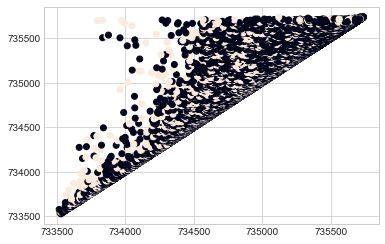

In [449]:
plt.scatter(x,y,c=train['final_status'])

In [450]:
y =train['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row))
x =train['created_time'].map(lambda row :  matplotlib.dates.date2num(row))

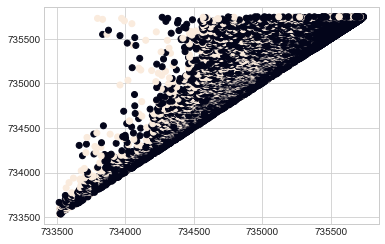

In [451]:
plt.scatter(x,y,c=train['final_status'])

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


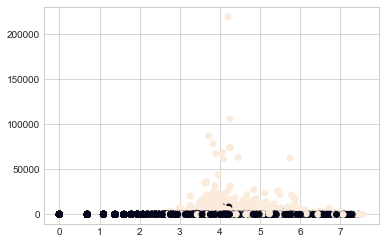

In [452]:
plt.scatter(np.log(y-x),train['backers_count'],c=train['final_status'])

In [633]:
train[(train['backers_count'] == np.max(train['backers_count']))]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,launched_at,backers_count,final_status,deadline_time,state_changed_time,created_time,launched_time,actual_money,dead-state_changed,state-created
92361,kkst581550534,Exploding Kittens,This is a card game for people who are into ki...,10000.0,exploding-kittens,0,10,8,1424397600,1424397679,...,1421776819,219382,1,2015-02-20,2015-02-20,2014-12-15,2015-01-20,10000.0,31.0,67.0


In [634]:
greated_than_75 = train[train['backers_count']>np.percentile(train['backers_count'],95)]
print(np.percentile(train['backers_count'],95))
print(greated_than_75.shape)
final = greated_than_75[greated_than_75['final_status'] == 1]
print(final.shape)

380.0
(5389, 21)
(4781, 21)


In [562]:
train['backers_count']

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


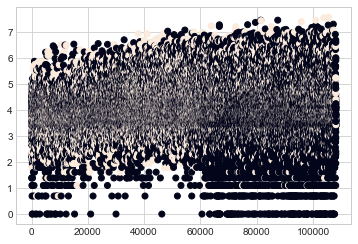

In [454]:
plt.scatter(range(len(y)),np.log(y-x),c = train['final_status'])
#np.log(train['state_changed_time']-train['created_time']) should have some impact

In [635]:
itrain,itest = train_test_split(range(train.shape[0]),train_size=0.7)
mask = np.ones(train.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [964]:
def split_keywords(keywords):
    result = keywords.split("-")
    return result

In [965]:
train['split_keywords']  = train['keywords'].map(lambda row: split_keywords(row))
test['split_keywords'] = test['keywords'].map(lambda row: split_keywords(row))

In [966]:
total_keywords_word_vec = list(train['split_keywords'])

In [967]:
total_keywords_word_vec_test = list(test['split_keywords'])

In [968]:
sentence_list = total_keywords_word_vec+total_keywords_word_vec_test

In [878]:
from gensim.models import word2vec

In [879]:
num_features = 50     # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
print ("Training model...")
model = word2vec.Word2Vec(sentence_list, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_wminwords_10context"
model.save(model_name)

Training model...


In [882]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    #print("her")
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    if(nwords>0.):
        featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(sentences, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    sentenceFeatureVecs = np.zeros((len(sentences),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for sentence in sentences:
        if (counter%1000 == 0):
            print ("sentence %d of %d" % (counter, len(sentences)))
        sentenceFeatureVecs[counter] = makeFeatureVec(sentence, model,num_features)
        counter = counter + 1
    return sentenceFeatureVecs

In [883]:
sentencesFeatureVecs_train = getAvgFeatureVecs(total_keywords_word_vec,model,num_features)

sentence 0 of 108129
sentence 1000 of 108129
sentence 2000 of 108129
sentence 3000 of 108129
sentence 4000 of 108129
sentence 5000 of 108129
sentence 6000 of 108129
sentence 7000 of 108129
sentence 8000 of 108129
sentence 9000 of 108129
sentence 10000 of 108129
sentence 11000 of 108129
sentence 12000 of 108129
sentence 13000 of 108129
sentence 14000 of 108129
sentence 15000 of 108129
sentence 16000 of 108129
sentence 17000 of 108129
sentence 18000 of 108129
sentence 19000 of 108129
sentence 20000 of 108129
sentence 21000 of 108129
sentence 22000 of 108129
sentence 23000 of 108129
sentence 24000 of 108129
sentence 25000 of 108129
sentence 26000 of 108129
sentence 27000 of 108129
sentence 28000 of 108129
sentence 29000 of 108129
sentence 30000 of 108129
sentence 31000 of 108129
sentence 32000 of 108129
sentence 33000 of 108129
sentence 34000 of 108129
sentence 35000 of 108129
sentence 36000 of 108129
sentence 37000 of 108129
sentence 38000 of 108129
sentence 39000 of 108129
sentence 4000

In [884]:
sentencesFeatureVecs_test = getAvgFeatureVecs(total_keywords_word_vec_test,model,num_features)

sentence 0 of 63465
sentence 1000 of 63465
sentence 2000 of 63465
sentence 3000 of 63465
sentence 4000 of 63465
sentence 5000 of 63465
sentence 6000 of 63465
sentence 7000 of 63465
sentence 8000 of 63465
sentence 9000 of 63465
sentence 10000 of 63465
sentence 11000 of 63465
sentence 12000 of 63465
sentence 13000 of 63465
sentence 14000 of 63465
sentence 15000 of 63465
sentence 16000 of 63465
sentence 17000 of 63465
sentence 18000 of 63465
sentence 19000 of 63465
sentence 20000 of 63465
sentence 21000 of 63465
sentence 22000 of 63465
sentence 23000 of 63465
sentence 24000 of 63465
sentence 25000 of 63465
sentence 26000 of 63465
sentence 27000 of 63465
sentence 28000 of 63465
sentence 29000 of 63465
sentence 30000 of 63465
sentence 31000 of 63465
sentence 32000 of 63465
sentence 33000 of 63465
sentence 34000 of 63465
sentence 35000 of 63465
sentence 36000 of 63465
sentence 37000 of 63465
sentence 38000 of 63465
sentence 39000 of 63465
sentence 40000 of 63465
sentence 41000 of 63465
sente

In [808]:
sentencesFeatureVecs_train.shape

(108129, 50)

In [969]:
for i in range(50):
    train["col"+str(i)] = sentencesFeatureVecs_train[:,i]
    test["col"+str(i)] = sentencesFeatureVecs_test[:,i]

In [970]:
test.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,0,20,12,1449619185,1449619185,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,0,20,12,1453435620,1453435620,...,-0.059001,-0.028090,0.163973,-0.080393,0.008140,-0.054514,-0.043717,0.057653,-0.020781,0.052772
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,0,20,12,1451780700,1451780700,...,0.002076,0.145076,0.212166,-0.086271,-0.046451,-0.066295,-0.012759,0.049989,-0.075752,0.063371
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,0,20,12,1445021518,1445021530,...,0.015444,0.131476,0.248609,-0.112607,-0.062315,0.032258,-0.008919,0.019845,-0.060229,0.001211
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,0,20,12,1462068840,1462068844,...,0.033496,0.143854,0.142634,-0.066922,-0.015402,-0.069219,-0.046497,0.030204,-0.032165,-0.041081


In [971]:
features = ['actual_money','dead-state_changed','state-created']
features_temp = []
for i in range(50):
    features_temp.append("col"+str(i))
print(features_temp)

['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49']


In [972]:
def normalize_data_frame(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

In [980]:
train_normalized = normalize_data_frame(train[features_temp])
test_normalized  = normalize_data_frame(test[features_temp])

In [752]:
explained_variance = []
for comp in range(2,10):
    pca = PCA(n_components=comp)
    X_pca = pca.fit_transform(train_normalized)
    explained_variance.append(pca.explained_variance_ratio_.sum())
    

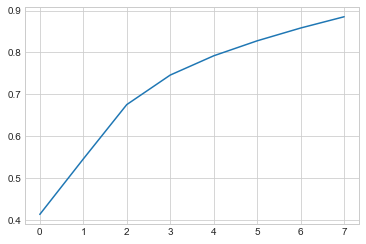

In [753]:
plt.plot(explained_variance)

In [981]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(train_normalized)
print(pca.explained_variance_ratio_.sum())

0.960086521437


In [982]:
pca = PCA(n_components=20)
X_pca_test = pca.fit_transform(test_normalized)
print(pca.explained_variance_ratio_.sum())

0.962521268484


In [983]:
features = ['actual_money','dead-state_changed','state-created','backers_count','final_status']
features_test = ['actual_money','dead-state_changed','state-created']
train_normalized = train[features]
test_normalized =  test[features_test]
for i in range(20):
    train_normalized['col'+str(i)] = X_pca[:,i]
    test_normalized['col'+str(i)] = X_pca_test[:,i]

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [820]:
train_normalized.head()

,actual_money,dead-state_changed,state-created,backers_count,final_status,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,20.0,9.0,9.0,3,1,-0.352215,0.112451,0.243811,-0.147131,0.044476,0.335114,-0.027631,-0.020788,0.010491,0.030218
1,300.0,16.0,18.0,2,0,-0.064782,-0.321280,-0.025202,0.127353,-0.021143,0.177404,-0.004127,-0.167922,0.145691,0.085870
2,30.0,10.0,10.0,0,0,-0.439398,-0.068025,-0.217733,-0.071913,0.114053,-0.126683,-0.017140,-0.005916,-0.061692,0.104279
3,500.0,30.0,30.0,18,1,0.599433,-0.297234,0.049217,-0.256905,0.036198,-0.010275,0.024472,0.100848,0.138065,-0.029945
4,2000.0,30.0,30.0,1,0,0.016051,-0.233305,-0.037393,0.025566,-0.068685,0.063465,0.049978,-0.078916,0.099218,0.022634


In [821]:
test_normalized.head()

,actual_money,dead-state_changed,state-created,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,7000.0,2419.0,2419.0,1.257693,0.502137,-0.049500,0.216339,-0.033123,-0.062375,-0.066933,-0.018699,-0.009585,0.040921
1,35000.0,2459.0,2460.0,0.681875,-0.660409,-0.286921,-0.304820,0.823762,-0.491165,0.074926,-0.068576,-0.329954,-0.084465
2,49500.0,2427.0,2427.0,0.242072,-0.396921,-0.277363,-0.215497,0.224847,-0.175878,-0.011864,-0.068960,0.024046,-0.068594
3,40000.0,2361.0,2361.0,-0.155968,-0.075262,-0.247897,0.089791,0.041503,0.143181,-0.153152,0.356685,0.043327,0.043858
4,20000.0,2557.0,2557.0,0.540603,-0.590893,-0.480677,-0.277228,-0.054120,-0.355378,0.100003,0.095769,0.031242,0.027627


In [822]:
train_normalized.head()

,actual_money,dead-state_changed,state-created,backers_count,final_status,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,20.0,9.0,9.0,3,1,-0.352215,0.112451,0.243811,-0.147131,0.044476,0.335114,-0.027631,-0.020788,0.010491,0.030218
1,300.0,16.0,18.0,2,0,-0.064782,-0.321280,-0.025202,0.127353,-0.021143,0.177404,-0.004127,-0.167922,0.145691,0.085870
2,30.0,10.0,10.0,0,0,-0.439398,-0.068025,-0.217733,-0.071913,0.114053,-0.126683,-0.017140,-0.005916,-0.061692,0.104279
3,500.0,30.0,30.0,18,1,0.599433,-0.297234,0.049217,-0.256905,0.036198,-0.010275,0.024472,0.100848,0.138065,-0.029945
4,2000.0,30.0,30.0,1,0,0.016051,-0.233305,-0.037393,0.025566,-0.068685,0.063465,0.049978,-0.078916,0.099218,0.022634


In [855]:
features = ['actual_money','dead-state_changed','state-created']
for i in range(10):
    features.append("col"+str(i))

In [984]:
#train_normalized = train_normalized[train_normalized['backers_count'] < 380]

itrain1,itest1 = train_test_split(range(train_normalized.shape[0]),train_size=0.7)
mask1 = np.ones(train_normalized.shape[0],dtype='int')
mask1[itrain1] = 1
mask1[itest1] = 0
mask1 = (mask1==1)

In [985]:
train_normalized.head()

,actual_money,dead-state_changed,state-created,backers_count,final_status,col0,col1,col2,col3,col4,...,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,20.0,9.0,9.0,3,1,0.282549,0.035110,0.145856,-0.030973,-0.166288,...,0.038695,-0.075888,0.003773,-0.035634,0.074502,0.026836,0.037628,0.065723,0.010694,-0.042010
1,300.0,16.0,18.0,2,0,0.056743,-0.314858,-0.127430,0.134773,-0.067999,...,-0.178196,0.064288,-0.038154,-0.020071,0.071044,0.082258,0.061154,0.149368,-0.080151,-0.058558
2,30.0,10.0,10.0,0,0,0.393165,-0.359293,-0.081359,-0.242371,0.075804,...,0.006896,0.192401,0.016699,-0.047014,0.029386,-0.035033,-0.003232,-0.132014,-0.006900,0.041144
3,500.0,30.0,30.0,18,1,-0.557545,-0.250378,0.162471,-0.071224,-0.121305,...,-0.172496,-0.008742,-0.162872,-0.172401,0.031358,-0.037649,-0.086242,-0.038356,-0.143562,0.016390
4,2000.0,30.0,30.0,1,0,0.046358,-0.206429,-0.063654,0.073266,-0.064869,...,-0.095012,0.002552,-0.044042,-0.173903,0.046276,0.044596,-0.022130,0.058916,-0.094905,0.018844


In [858]:
def cv_optimize(clf,parameters,Xtrain,Ytrain,nfolds,score_func,njobs=1):
    print (njobs)
    if(score_func):
        gs = GridSearchCV(clf,param_grid=parameters,cv=nfolds,n_jobs=njobs,scoring=score_func)
    else:
        gs = GridSearchCV(clf,param_grid=parameters,cv=nfolds,n_jobs=njobs)
    gs.fit(Xtrain,Ytrain)
    print (gs.best_params_,gs.best_score_,gs.grid_scores_)
    best = gs.best_estimator_
    return best,gs.grid_scores_


In [859]:
def do_classify(clf,parameters,indf,featurenames,targetname,mask,njobs = 1,score_func=None,nfolds = 10):
    subdf = indf[featurenames]
    X = subdf.values
    y = indf[targetname].values
    if mask[0]!=None:
        print ("using Mask")
        Xtrain,Ytrain,Xtest,Ytest = X[mask],y[mask],X[~mask],y[~mask]
    else:
        print ("mask not found")
    grid_score = None
    if parameters:
        clf,grid_score = cv_optimize(clf,parameters,Xtrain,Ytrain,njobs=njobs,nfolds = nfolds,score_func = score_func)
    clf_on_train = clf.fit(Xtrain,Ytrain)
    training_accuracy = clf_on_train.score(Xtrain,Ytrain)
    test_accuracy = clf_on_train.score(Xtest,Ytest)
    print ("test_accuracy", test_accuracy)
    clf_on_total = clf.fit(X,y)
    
    return clf_on_total,grid_score,clf.score(Xtrain,Ytrain),clf.score(Xtest,Ytest)

In [770]:
ridge_model = Ridge()
parameters = { "alpha":[1,5,7]}
featurenames = features

In [771]:
ridge_model_fit,grid_score,tscore,testscore = do_classify(ridge_model,parameters,train_normalized,featurenames,'backers_count',mask1,njobs=1,nfolds=10)

using Mask
1
{'alpha': 7} -0.012984483569842355 [mean: -0.01299, std: 0.02136, params: {'alpha': 1}, mean: -0.01299, std: 0.02136, params: {'alpha': 5}, mean: -0.01298, std: 0.02136, params: {'alpha': 7}]
test_accuracy 0.0157420086062


In [772]:
print(tscore,testscore)

0.0180031409593 0.0161096803925


In [692]:
test_data = train_normalized[~mask1]
test_data['backers_count'] = ridge_model_fit.predict(test_data[featurenames])

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
y =train['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row))
x =train['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row))

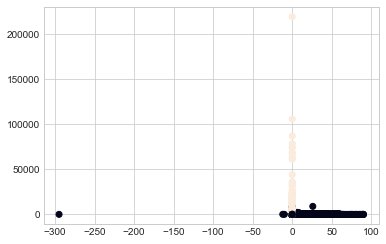

In [25]:
plt.scatter((x-y),train['backers_count'],c=train['final_status'])

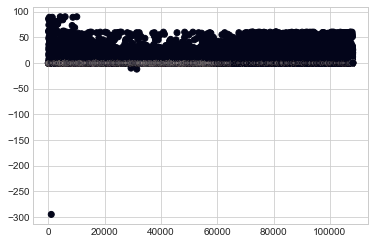

In [26]:
plt.scatter(range(len(y)),(x-y),c = train['final_status'])
#this difference should play a significant role

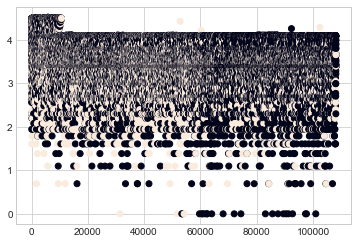

In [27]:
y =train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row))
x =train['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row))
plt.scatter(range(len(y)),np.log(x-y),c = train['final_status'])

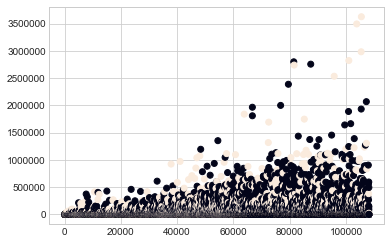

In [28]:
y =train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row))
x =train['created_time'].map(lambda row :  matplotlib.dates.date2num(row))
plt.scatter(range(len(y)),(y-x)**2,c = train['final_status'])

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


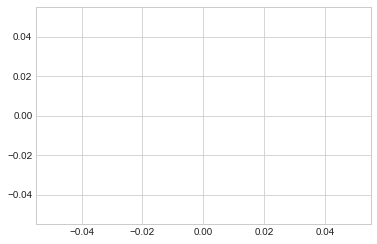

In [29]:
plt.scatter(range(len(y)),np.log(x-y),c = train['final_status'])

In [30]:
rates = {
    'GBP': 1.38,
    'CAD': 0.77,
    'AUD': 0.75,
    'EUR': 1.13,
    'NZD': 0.70,
    'SEK': 0.11,
    'DKK': 0.15,
    'NOK': 0.12,
    'CHF': 1.0, # in test
    'HKD': 0.13, #in Test
    'SGD': 0.73, #in Test
    'MXN': 0.07 # in Test
}

In [31]:
train['actual_money'] = train.apply(lambda row: row['goal']*rates[row['currency']] if(not(row['currency'] == 'USD')) else row['goal'],axis=1) 

In [32]:
test['actual_money'] = test.apply(lambda row: row['goal']*rates[row['currency']] if(not(row['currency'] == 'USD')) else row['goal'],axis=1) 

In [33]:
lb = LabelEncoder()
train['country'] = lb.fit_transform(train['country'].astype('str'))
train['currency'] = lb.fit_transform(train['currency'].astype('str'))
train['disable_communication'] = lb.fit_transform(train['disable_communication'].astype('str'))
test['country'] = lb.fit_transform(test['country'].astype('str'))
test['currency'] = lb.fit_transform(test['currency'].astype('str'))
test['disable_communication'] = lb.fit_transform(test['disable_communication'].astype('str'))
train['dead-state_changed'] = ( train['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))
test['dead-state_changed'] = ( test['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))
train['state-created'] = (train['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )
test['state-created'] = (test['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )

In [34]:
train['dead-state_changed'] = ( train['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))

In [35]:
test['dead-state_changed'] = ( test['deadline_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['launched_time'].map(lambda row :  matplotlib.dates.date2num(row)))

In [191]:
train['state-created'] = (train['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )

In [192]:
test['state-created'] = np.log(test['state_changed_time'].map(lambda row :  matplotlib.dates.date2num(row)) - train['created_time'].map(lambda row :  matplotlib.dates.date2num(row)) )

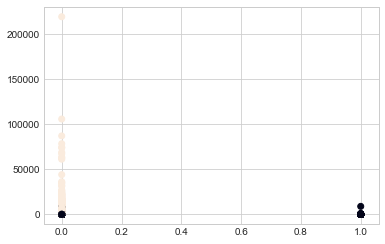

In [38]:
plt.scatter(train['disable_communication'],train['backers_count'],c=train['final_status'])

In [39]:
itrain,itest = train_test_split(range(train.shape[0]),train_size=0.7)
mask = np.ones(train.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [693]:
features = ['disable_communication','country','currency','actual_money','dead-state_changed','state-created']
target = 'backers_count'

In [894]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % mean_squared_error(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

In [42]:
# xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=10,max_depth=8,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=10,scale_pos_weight=1,seed=27)
# xgbFit = modelfit(xgb1,train[mask],features,target)
# test_data = train[~mask]
# test_predictions = xgbFit.predict(test_data[features])
# print(mean_squared_error(test_data[target].values, test_predictions))

In [895]:
features = ['actual_money','dead-state_changed','state-created']
target = 'backers_count'
for i in range(10):
    features.append("col"+str(i))

In [896]:
target

'backers_count'


Model Report
Accuracy : 5936
5957.07054777


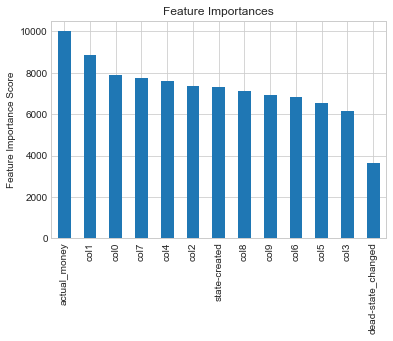

In [897]:
xgb_backer = XGBClassifier(learning_rate=0.1,n_estimators=10,max_depth=6,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27)
xgbFit_backer = modelfit(alg=xgb_backer,dtrain=train_normalized,predictors=features,target=target,useTrainCV=False)
test_data = train_normalized[~mask1]
test_predictions = xgbFit_backer.predict(test_data[features])
print(mean_squared_error(test_data[target].values, test_predictions))

In [44]:

# Model Report
# Accuracy : 1.49e+06
# 1189552.38639
# # xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=5,max_depth=15,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=10,scale_pos_weight=1,seed=27)
# # xgbFit = modelfit(xgb1,train[mask],features,target,useTrainCV=False)
# # #predictions = xgbFit.predict(test_data[features])

In [898]:
#train_data = train[mask]
test['backers_count'] = xgbFit_backer.predict(test[features])
#test_data['backers_count'] = xgbFit_backer.predict(test_data[features])

In [902]:
test[test['backers_count']>60]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,col41,col42,col43,col44,col45,col46,col47,col48,col49,backers_count


In [986]:

target = 'final_status'
train_data = train_normalized[mask1]
test_data = train_normalized[~mask1]
features = ['actual_money','dead-state_changed','state-created']
for i in range(20):
    features.append("col"+str(i))
print(features)

['actual_money', 'dead-state_changed', 'state-created', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19']


In [987]:
def modelfit(alg, dtrain,dtest, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    train_set = dtrain
    test_set = dtest
    alg.fit(train_set[predictors], train_set[target],eval_metric='auc')
        
    #Predict training set:
    dtest_predictions = alg.predict(test_set[predictors])
    #dtest_predictions = (alg.predict_proba(test_set[predictors])[:,1]>0.3)*1
    
    dtrain_predictions = alg.predict(train_set[predictors])
    #dtrain_predictions = (alg.predict_proba(train_set[predictors])[:,1]>0.3) * 1
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(train_set[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % roc_auc_score(train_set[target], dtrain_predprob))

    print ("Accuracy : %.4g" % accuracy_score(test_set[target].values, dtest_predictions))
    #print ("AUC Score (Train): %f" % roc_auc_score(test_set[target], dtest_predprob))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg


Model Report
Accuracy : 0.7263
Accuracy : 0.699


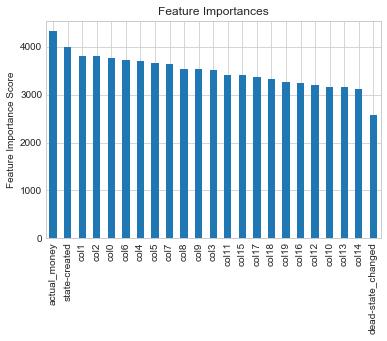

In [997]:
parameters = {
    'colsample'
}
xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=70,max_depth=15,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='binary:logistic',nthread=10,scale_pos_weight=1,seed=27,reg_lambda=1000 )
xgbFit = modelfit(xgb1,train_data,test_data,features,target,useTrainCV=False)

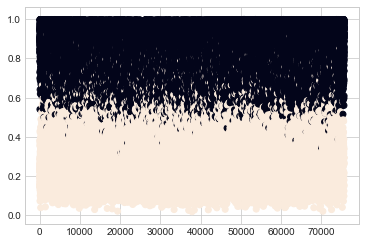

In [992]:
train_set = train_normalized[mask1]
train_predictions = xgbFit.predict_proba(train_set[features])[:,0]
plt.scatter(range(len(train_predictions)),train_predictions,c=train_set['final_status'])

In [50]:
sample = pd.read_csv("samplesubmission.csv")

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,...,col41,col42,col43,col44,col45,col46,col47,col48,col49,backers_count


In [993]:
hamse_na_ho_payega = test[['project_id']]

In [994]:
hamse_na_ho_payega['final_status'] = xgbFit.predict(test[features])

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [995]:
hamse_na_ho_payega.to_csv('hamse_na_ho_payega.csv',index=False)

In [54]:
predictions = xgbFit.predict_proba(test[features])

In [55]:
predictions

array([[  9.99431491e-01,   5.68479998e-04],
       [  9.99431491e-01,   5.68479998e-04],
       [  9.99431491e-01,   5.68479998e-04],
       ..., 
       [  9.99431491e-01,   5.68479998e-04],
       [  9.99431491e-01,   5.68479998e-04],
       [  9.78088558e-01,   2.19114143e-02]], dtype=float32)